# AED :

In [ ]:
#importation des bibliothèques
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re

## fonctions utilisées : implémentation des fonctions  

In [437]:
def nettoyer_texte(text):
    """
    Fonction pour nettoyer les textes en supprimant certains motifs
    """
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]\(.*?\)', '', text)    # Supprimes mes URLs
    text = re.sub(r'<.*?>+', '', text)                                  # Supprime les balises
    text = re.sub(r'@\w+', '', text)                                    # Supprime les mentions
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)       # Supprime la ponctuation
    text = re.sub(r'\n', '', text)                                      # Supprime les sauts de ligne
    text = re.sub(r'\w*\d\w*', '', text)                                # Supprime les mots contenants des chiffres
    text = re.sub(r'\s+', ' ', text)                                    # Supprime les espaces supplémenraires
    return text.strip()

In [438]:
#description_dataframe
def description_dataframe(data) :

    print("description du dataframe")
    print(f"-colonnes : ", list(data.columns), "\n")

    print(f"- Infos du dataframe :")
    data.info()

    print("\n - Description du dataframe : ")
    print(data.describe())

    print("\n - Entetes (10 premières lignes) du dataframe : ")
    print(data.head(10))


In [439]:
# description du premier chunk
def description(chunk_list) :
    for chunk in chunk_list :
        print("description du premier chunk pour tester")
        print(f"-colonnes : ", list(chunk.columns), "\n")

        print(f"- Infos :")
        chunk.info()

        print("\n - Description : ")
        print(chunk.describe())

        print("\n - Entetes (10 premières lignes) : ")
        print(chunk.head(10))
        break

In [440]:
#valeurs uniques :
def uv (chunks_list) :
    for i, chunk in enumerate(chunks_list):
        print(f"Chunk {i + 1} , sa taille : {chunk.shape[0]} lignes et {chunk.shape[1]} colonnes ")
        for col in chunk.columns:
            unique_count = chunk[col].nunique()
            print(f"{col}: {unique_count} valeurs uniques")
        break


In [441]:
# valuers nulles
def null_v (chunks_list) :
    for i, chunk in enumerate(chunks_list):
        print(f"Chunk {i + 1} , sa taille : {chunk.shape[0]} lignes et {chunk.shape[1]} colonnes ")
        for col in chunk.columns:
            valeur_null = chunk[col].isnull().sum()
            print(f"{col}: {valeur_null} valeurs nulles")
        break

In [442]:
# valuers nulles
def null_v_all_chunks(chunks_list):
    # initialisation d'un dicto pour sommer les NaN par colonne
    total_nulls = {}

    for i, chunk in enumerate(chunks_list):
        # print(f"Chunk {i + 1} : {chunk.shape[0]} lignes, {chunk.shape[1]} colonnes")

        # Somme des NaN dans le chunk
        chunk_nulls = chunk.isnull().sum()

        # Ajout au total
        for col in chunk.columns:
            total_nulls[col] = total_nulls.get(col, 0) + chunk_nulls[col]

    # Affichage des totaux par colonne
    print("\nTotal de valeurs nulles par colonne (tous chunks confondus) :")
    for col, null_count in total_nulls.items():
        print(f"{col} : {null_count} valeurs nulles")


In [443]:
# valuers nulles 
def null_v_df (data) : 

    print(f"la dataframe, sa taille : {data.shape[0]} lignes et {data.shape[1]} colonnes ")
    for col in data.columns:
        valeur_null = data[col].isnull().sum()
        print(f"{col}: {valeur_null} valeurs nulles")

In [444]:
# bruits
def detect_bruits_bizarres(df, symbols_to_check=['%', '#', '@', '*', '$']):
    """
    Détecte les 'bruits bizarres' dans une DataFrame.
    
    Params:
    - df : DataFrame pandas
    - symbols_to_check : liste de symboles suspects à vérifier dans les colonnes texte
    
    Return:
    - Dictionnaire : colonnes → lignes suspectes (index + valeur)
    """
    bruits = {}

    for col in df.columns:
        # on convertit en string pour faciliter les recherches de patterns
        col_as_str = df[col].astype(str)

        # Conditions de "bruits bizarres"
        condition_nan_text = col_as_str.str.lower() == 'nan'
        condition_empty = col_as_str.str.strip() == ''
        condition_symbols = col_as_str.apply(lambda x: any(symb in x for symb in symbols_to_check))

        # Lignes qui matchent l'une des conditions
        mask_bruit = condition_nan_text | condition_empty | condition_symbols

        if mask_bruit.any():
            # On stocke uniquement les lignes concernées
            bruits[col] = df.loc[mask_bruit, col]

    return bruits


## table 8 tmdb CSV : importation et nettoyage de données et de la table

In [445]:
#lecture du CSV créer
chunks_tmdb=pd.read_csv('tmdb_full.csv',
                    chunksize=500000,
                    sep=','
                    # na_values='\\N'
                    )
chunks_list_tmdb = [chunk for chunk in chunks_tmdb]

C:\Users\Ahcene\AppData\Local\Temp\ipykernel_7632\2413866732.py:7: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  chunks_list_tmdb = [chunk for chunk in chunks_tmdb]


In [446]:
description(chunks_list_tmdb)

description du premier chunk pour tester
-colonnes :  ['adult', 'backdrop_path', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'production_companies_name', 'production_companies_country'] 

- Infos :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   adult                         309572 non-null  bool   
 1   backdrop_path                 151760 non-null  object 
 2   budget                        309572 non-null  int64  
 3   genres                        309572 non-null  object 
 4   homepage                      44262 non-null   object 
 5   id                            

In [447]:
null_v(chunks_list_tmdb)

Chunk 1 , sa taille : 309572 lignes et 25 colonnes 
adult: 0 valeurs nulles
backdrop_path: 157812 valeurs nulles
budget: 0 valeurs nulles
genres: 0 valeurs nulles
homepage: 265310 valeurs nulles
id: 0 valeurs nulles
imdb_id: 0 valeurs nulles
original_language: 0 valeurs nulles
original_title: 0 valeurs nulles
overview: 27060 valeurs nulles
popularity: 0 valeurs nulles
poster_path: 45413 valeurs nulles
production_countries: 0 valeurs nulles
release_date: 8233 valeurs nulles
revenue: 0 valeurs nulles
runtime: 0 valeurs nulles
spoken_languages: 0 valeurs nulles
status: 0 valeurs nulles
tagline: 234999 valeurs nulles
title: 0 valeurs nulles
video: 0 valeurs nulles
vote_average: 0 valeurs nulles
vote_count: 0 valeurs nulles
production_companies_name: 0 valeurs nulles
production_companies_country: 145134 valeurs nulles


In [448]:
chunks_list_tmdb = [chunk.drop(columns=['backdrop_path', 'homepage', 'tagline', 'production_companies_country']) for chunk in chunks_list_tmdb]

In [449]:
null_v(chunks_list_tmdb)

Chunk 1 , sa taille : 309572 lignes et 21 colonnes 
adult: 0 valeurs nulles
budget: 0 valeurs nulles
genres: 0 valeurs nulles
id: 0 valeurs nulles
imdb_id: 0 valeurs nulles
original_language: 0 valeurs nulles
original_title: 0 valeurs nulles
overview: 27060 valeurs nulles
popularity: 0 valeurs nulles
poster_path: 45413 valeurs nulles
production_countries: 0 valeurs nulles
release_date: 8233 valeurs nulles
revenue: 0 valeurs nulles
runtime: 0 valeurs nulles
spoken_languages: 0 valeurs nulles
status: 0 valeurs nulles
title: 0 valeurs nulles
video: 0 valeurs nulles
vote_average: 0 valeurs nulles
vote_count: 0 valeurs nulles
production_companies_name: 0 valeurs nulles


In [450]:
# chunks_list_tmdb = [chunk.dropna(subset=['poster_path', 'release_date']) for chunk in chunks_list_tmdb]

In [451]:
null_v(chunks_list_tmdb)

Chunk 1 , sa taille : 309572 lignes et 21 colonnes 
adult: 0 valeurs nulles
budget: 0 valeurs nulles
genres: 0 valeurs nulles
id: 0 valeurs nulles
imdb_id: 0 valeurs nulles
original_language: 0 valeurs nulles
original_title: 0 valeurs nulles
overview: 27060 valeurs nulles
popularity: 0 valeurs nulles
poster_path: 45413 valeurs nulles
production_countries: 0 valeurs nulles
release_date: 8233 valeurs nulles
revenue: 0 valeurs nulles
runtime: 0 valeurs nulles
spoken_languages: 0 valeurs nulles
status: 0 valeurs nulles
title: 0 valeurs nulles
video: 0 valeurs nulles
vote_average: 0 valeurs nulles
vote_count: 0 valeurs nulles
production_companies_name: 0 valeurs nulles


In [452]:
data_tmdb = pd.concat(chunks_list_tmdb, ignore_index=True)
data_tmdb.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,production_companies_name
0,False,0,['Comedy'],3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,2.852,/zBiHKhXklvTFwj4M1uEUcQGAVJ.jpg,...,1938-11-30,0,70,['en'],Released,Blondie,False,7.214,7,['Columbia Pictures']
1,False,0,['Adventure'],6124,tt0011436,de,Der Mann ohne Namen,NaN,1.091,/6xUbUCvndklbGVYiljHr34NTxSl.jpg,...,1921-01-01,0,420,[],Released,"Peter Voss, Thief of Millions",False,0.000,0,[]
2,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,1962-06-22,0,110,"['it', 'ja', 'pl', 'fr', 'de']",Released,Love at Twenty,False,6.700,41,"['Ulysse Productions', 'Unitec Films', 'Cinese..."
3,False,0,"['Drama', 'Comedy', 'Crime']",2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,9.214,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,...,1988-10-21,0,73,['fi'],Released,Ariel,False,7.046,248,['Villealfa Filmproductions']
4,False,0,"['Drama', 'Comedy', 'Romance']",3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",6.282,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,...,1986-10-17,0,76,['en'],Released,Shadows in Paradise,False,7.182,269,['Villealfa Filmproductions']


In [453]:
data_tmdb.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'video', 'vote_average',
       'vote_count', 'production_companies_name'],
      dtype='object')

<Axes: >

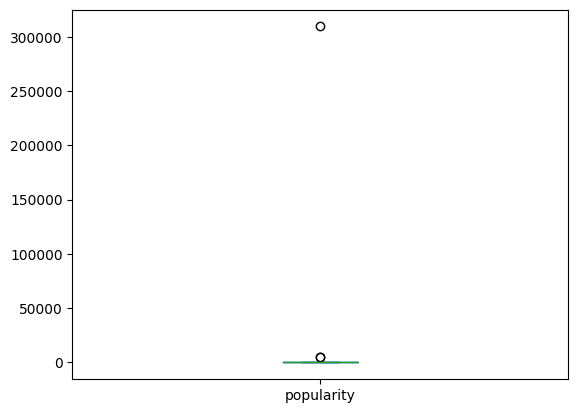

In [454]:
data_tmdb['popularity'].describe(np.arange(0,1.1,0.1)).plot(kind='box')

In [455]:
data_tmdb['popularity'].describe(np.arange(0,1.1,0.1))

count    309572.000000
mean          2.719860
std          21.206599
min           0.600000
0%            0.600000
10%           0.600000
20%           0.600000
30%           0.654000
40%           0.841000
50%           1.083000
60%           1.392000
70%           1.670000
80%           2.517000
90%           4.966000
100%       5089.969000
max        5089.969000
Name: popularity, dtype: float64

In [456]:
data_tmdb.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'video', 'vote_average',
       'vote_count', 'production_companies_name'],
      dtype='object')

In [457]:
base_url = "https://image.tmdb.org/t/p/w500"

for element  in data_tmdb['poster_path'].iloc[:2] :
    poster_url = base_url + element 
    print(poster_url)


https://image.tmdb.org/t/p/w500/zBiHKhXklvTFwj4M1uEUcQGAVJ.jpg
https://image.tmdb.org/t/p/w500/6xUbUCvndklbGVYiljHr34NTxSl.jpg


In [458]:
data_tmdb['poster_url'] = data_tmdb['poster_path'].apply(lambda x: f'{base_url}{x}' if pd.notna(x) else np.nan)

In [459]:
for ele in data_tmdb['poster_url'].iloc[:5] :
    print(ele)

https://image.tmdb.org/t/p/w500/zBiHKhXklvTFwj4M1uEUcQGAVJ.jpg
https://image.tmdb.org/t/p/w500/6xUbUCvndklbGVYiljHr34NTxSl.jpg
https://image.tmdb.org/t/p/w500/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg
https://image.tmdb.org/t/p/w500/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
https://image.tmdb.org/t/p/w500/nj01hspawPof0mJmlgfjuLyJuRN.jpg


In [460]:
data_tmdb=data_tmdb[data_tmdb['adult'] == False]

data_tmdb.drop(columns=['poster_path'], inplace=True)

data_tmdb['release_date'] = pd.to_datetime(data_tmdb['release_date'])

data_tmdb=data_tmdb[data_tmdb['status']=='Released']

data_tmdb=data_tmdb[data_tmdb['video'] == False]

data_tmdb.drop(columns=['video', 'adult', 'status'], inplace=True)
# data_tmdb = data_tmdb[data_tmdb['release_date'].dt.year > (1980)]

# seuil = data_tmdb['popularity'].quantile(0.99)
# data_tmdb = data_tmdb[data_tmdb['popularity'] <= seuil]

#### Commentaires sur le nettoyage de données :
    Suppression des colonnes :
       - backdrop_path et homepage : non pertinentes à l'analyse,

    Suppression de films pour adultes,
    Mettre la date de réalisation en format datetime,
    Garder que les films ayant un statu réalisé,
    Garder que les films, suppression de courts métrages : colonne 'video' est false,
    Suppression des colonnes :
        - tagline non pertinente,
        - video, adult, et status : déjà filtrer auparavant

    Indice de popularité, comme vu avec le boxplot de l'indice de popularité, on en recense beaucoup de valeurs aberrantes (outilers), on a donc décidé de prendre la méthode .quartile(99%) => ce qui donne qu’on garde 99% des films où l’indice de popularité est le moins extrême donc, on élimine les outliers.

In [461]:
description_dataframe(data_tmdb)

description du dataframe
-colonnes :  ['budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'production_companies_name', 'poster_url'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 300269 entries, 0 to 309570
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   budget                     300269 non-null  int64         
 1   genres                     300269 non-null  object        
 2   id                         300269 non-null  int64         
 3   imdb_id                    300269 non-null  object        
 4   original_language          300269 non-null  object        
 5   original_title             300269 non-null  object        
 6   overview                   274241 non-null  obj

In [462]:
null_v_df(data_tmdb)

la dataframe, sa taille : 300269 lignes et 18 colonnes 
budget: 0 valeurs nulles
genres: 0 valeurs nulles
id: 0 valeurs nulles
imdb_id: 0 valeurs nulles
original_language: 0 valeurs nulles
original_title: 0 valeurs nulles
overview: 26028 valeurs nulles
popularity: 0 valeurs nulles
production_countries: 0 valeurs nulles
release_date: 5548 valeurs nulles
revenue: 0 valeurs nulles
runtime: 0 valeurs nulles
spoken_languages: 0 valeurs nulles
title: 0 valeurs nulles
vote_average: 0 valeurs nulles
vote_count: 0 valeurs nulles
production_companies_name: 0 valeurs nulles
poster_url: 43171 valeurs nulles


In [463]:
titres_dupliques = data_tmdb['title'].value_counts()
titres_dupliques = titres_dupliques[titres_dupliques > 1]
print(titres_dupliques)

title
Home                                                     40
Alone                                                    37
Mother                                                   34
Cinderella                                               33
Love                                                     30
                                                         ..
Cheer Up                                                  2
King for a Day                                            2
If There Weren't Any Blacks You'd Have to Invent Them     2
First Shift                                               2
Ariel                                                     2
Name: count, Length: 18202, dtype: int64


In [464]:
# data_tmdb['title_cleaned'] = data_tmdb['original_title']

# data_tmdb['original_title'] = (
#     data_tmdb
#     .sort_values(['title_cleaned', 'release_date'])
#     .groupby('title_cleaned')
#     .cumcount()
#     .add(1)
#     .astype(str)
#     .radd(' ')
#     .radd(data_tmdb['title_cleaned'])
# )


In [465]:
description_dataframe(data_tmdb)

description du dataframe
-colonnes :  ['budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'title', 'vote_average', 'vote_count', 'production_companies_name', 'poster_url'] 

- Infos du dataframe :
<class 'pandas.core.frame.DataFrame'>
Index: 300269 entries, 0 to 309570
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   budget                     300269 non-null  int64         
 1   genres                     300269 non-null  object        
 2   id                         300269 non-null  int64         
 3   imdb_id                    300269 non-null  object        
 4   original_language          300269 non-null  object        
 5   original_title             300269 non-null  object        
 6   overview                   274241 non-null  obj

In [466]:
# séparer le format de la colonne genre 
data_tmdb['genres'] = data_tmdb['genres'].apply(
    lambda x : ' '.join(
        x.replace("[", "").replace("]", "").replace("'","").split(","))
        )


In [467]:
# Calcul du percentile 90% de popularité
popularity_threshold = data_tmdb['popularity'].quantile(0.50)
popularity_threshold_bb = data_tmdb['popularity'].quantile(0.80)

# Films français
mask_fr = data_tmdb['original_language'] == 'fr'

# Films américains
mask_us = data_tmdb['original_language'] == 'en'

# Films arts et essais
arts_essais_keywords = ['Documentary', 'Drama', 'Romance', 'History', 'Music', 'Biography']
mask_arts = data_tmdb['genres'].str.contains('|'.join(arts_essais_keywords), case=False, na=False)

# Films anciens + populaires (avant 1980 et popularité >= 90%)
mask_old_top = (data_tmdb['release_date'].dt.year < 1980) & (data_tmdb['popularity'] >= popularity_threshold)

# mask_blockbusters
mask_blockbusters = (data_tmdb['release_date'].dt.year >= 2000) & (data_tmdb['popularity'] >= popularity_threshold_bb)


# Combinaison finale
mask_final = mask_fr | mask_us | mask_arts | mask_old_top | mask_blockbusters

# Application du filtre
df_reduced = data_tmdb[mask_final]

# Optionnel : vérifier la taille
print(f"Nombre de films sélectionnés : {len(df_reduced)}")


Nombre de films sélectionnés : 258598


In [468]:
detect_bruits_bizarres(df_reduced)

{'genres': 419        
 1500       
 1814       
 2079       
 2919       
          ..
 309547     
 309548     
 309558     
 309560     
 309570     
 Name: genres, Length: 23221, dtype: object,
 'original_title': 524                                                 M*A*S*H
 2337                                               $5 a Day
 3796                           What the #$*! Do We (K)now!?
 6220                                *batteries not included
 6290      Everything You Always Wanted to Know About Sex...
                                 ...                        
 304702    $100 and a T-Shirt: A Documentary About Zines ...
 307107                               #1 Fan: A Darkomentary
 307703                                      $1 (One Dollar)
 307997                        How to Break 90 #4: Downswing
 308766                           How to Break 90 #5: Impact
 Name: original_title, Length: 442, dtype: object,
 'overview': 1                                                

In [469]:
# remplacer les bruits bizarres avec regex
df_reduced['original_title'] = df_reduced['original_title'].str.replace(r'[*#%@\$&]', '', regex=True)
df_reduced['title'] = df_reduced['title'].str.replace(r'[*#%@\$&]', '', regex=True)
df_reduced['production_companies_name'] = df_reduced['production_companies_name'].str.replace(r'[*#%@\$&]', '', regex=True)
df_reduced['genres'] = df_reduced['genres'].str.replace(r'[*#%@\$&]', '', regex=True)

df_reduced['original_title'] = df_reduced['original_title'].replace(r'^[nN][aA][nN]$', np.nan, regex=True)
df_reduced['title'] = df_reduced['title'].replace(r'^[nN][aA][nN]$', np.nan, regex=True)
df_reduced['production_companies_name'] = df_reduced['production_companies_name'].replace(r'^[nN][aA][nN]$', np.nan, regex=True)
df_reduced['genres'] = df_reduced['genres'].replace(r'^[nN][aA][nN]$', np.nan, regex=True)


C:\Users\Ahcene\AppData\Local\Temp\ipykernel_7632\3697549999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['original_title'] = df_reduced['original_title'].str.replace(r'[*#%@\$&]', '', regex=True)
C:\Users\Ahcene\AppData\Local\Temp\ipykernel_7632\3697549999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['title'] = df_reduced['title'].str.replace(r'[*#%@\$&]', '', regex=True)
C:\Users\Ahcene\AppData\Local\Temp\ipykernel_7632\3697549999.py:4: SettingWithCopyWarning: 
A value 

In [470]:
null_v_df(df_reduced)

la dataframe, sa taille : 258598 lignes et 18 colonnes 
budget: 0 valeurs nulles
genres: 0 valeurs nulles
id: 0 valeurs nulles
imdb_id: 0 valeurs nulles
original_language: 0 valeurs nulles
original_title: 0 valeurs nulles
overview: 15325 valeurs nulles
popularity: 0 valeurs nulles
production_countries: 0 valeurs nulles
release_date: 4722 valeurs nulles
revenue: 0 valeurs nulles
runtime: 0 valeurs nulles
spoken_languages: 0 valeurs nulles
title: 0 valeurs nulles
vote_average: 0 valeurs nulles
vote_count: 0 valeurs nulles
production_companies_name: 0 valeurs nulles
poster_url: 36179 valeurs nulles


In [471]:
df_reduced['popularity'].describe(np.arange(0,1.1,0.1))

count    258598.000000
mean          2.984754
std          23.047435
min           0.600000
0%            0.600000
10%           0.600000
20%           0.600000
30%           0.685000
40%           0.882000
50%           1.162000
60%           1.400000
70%           1.862000
80%           2.877000
90%           5.683300
100%       5089.969000
max        5089.969000
Name: popularity, dtype: float64

In [472]:
# # On filtre les films récents et populaires :
# new = df_reduced['popularity'].quantile(0.6)
# df_reduced_new = df_reduced[
#     (((df_reduced['release_date'].dt.year <= 2005) & (df_reduced['release_date'].dt.year >= 1990)) |
#     (df_reduced['popularity'] >= new) |
#     (df_reduced['vote_average'] >= 6.)) &
#     (~df_reduced['genres'].str.contains('Documentary', na=False))
# ]

In [ ]:
def extract_base_title(title):
    # Supprimer les chiffres, "part", "episode", etc.
    clean = re.sub(r'\b(part|episode|chapter)\b\s*\d*', '', title, flags=re.IGNORECASE)
    clean = re.sub(r'[^\w\s]', '', clean)  
    words = clean.strip().split()
    
    if len(words) >= 2:
        return ' '.join(words[:3])  
    elif words:
        return words[0]
    else:
        return 'Other'

In [512]:
def extract_saga_name(title):
    if pd.isna(title):
        return 'Other'
    title = title.lower()

    if 'harry potter' in title:
        return 'Harry Potter'
    elif 'lord of the rings' in title or 'hobbit' in title:
        return 'LOTR'
    elif 'avengers' in title:
        return 'Avengers'
    elif 'star wars' in title:
        return 'Star Wars'
    elif 'batman' in title:
        return 'Batman'
    elif 'spider-man' in title or 'spiderman' in title:
        return 'Spider-Man'
    elif 'fast and furious' in title or 'fast & furious' in title:
        return 'Fast & Furious'
    else:
        base = extract_base_title(title)
        return base if base else 'Other'

df_reduced['saga_name'] = df_reduced['original_title'].apply(extract_saga_name)

C:\Users\Ahcene\AppData\Local\Temp\ipykernel_7632\2979911028.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['saga_name'] = df_reduced['original_title'].apply(extract_saga_name)


In [513]:
df_reduced['saga_name'].isna().sum()

np.int64(0)

In [514]:
df_reduced['saga_name'].value_counts().head(100)

saga_name
the adventures of       141
the making of           135
the man who             114
the legend of           109
night of the             89
                       ... 
last of the              20
romeo and juliet         20
the disappearance of     20
so you want              20
la casa de               20
Name: count, Length: 100, dtype: int64

In [515]:
# On garde les saga_name fréquentes (>=2 apparitions)
vc = df_reduced['saga_name'].value_counts()
sagas_valides = vc[vc > 2].index.tolist()

# On remplace les autres par 'Other'
df_reduced['saga_name_clean'] = df_reduced['saga_name'].apply(
    lambda x: x if x in sagas_valides else 'Other'
)

df_reduced.drop(columns='saga_name', inplace=True)


C:\Users\Ahcene\AppData\Local\Temp\ipykernel_7632\2936246362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['saga_name_clean'] = df_reduced['saga_name'].apply(
C:\Users\Ahcene\AppData\Local\Temp\ipykernel_7632\2936246362.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.drop(columns='saga_name', inplace=True)


In [516]:
df_reduced['saga_name_clean'].value_counts(ascending=True)

saga_name_clean
sortie de la                    3
gus arnheim and                 3
congregation leaving st         3
gimme shelter                   3
the dark knight                 3
                            ...  
the legend of                 109
the man who                   114
the making of                 135
the adventures of             141
Other                      223981
Name: count, Length: 7077, dtype: int64

In [517]:
# df_reduced_new[df_reduced_new['original_title'].str.contains('harry', case=False, na=False) & 
#                df_reduced_new['original_title'].str.contains('potter', case=False, na=False)]


In [518]:
null_v_df(df_reduced)

la dataframe, sa taille : 258598 lignes et 19 colonnes 
budget: 0 valeurs nulles
genres: 0 valeurs nulles
id: 0 valeurs nulles
imdb_id: 0 valeurs nulles
original_language: 0 valeurs nulles
original_title: 0 valeurs nulles
overview: 15325 valeurs nulles
popularity: 0 valeurs nulles
production_countries: 0 valeurs nulles
release_date: 4722 valeurs nulles
revenue: 0 valeurs nulles
runtime: 0 valeurs nulles
spoken_languages: 0 valeurs nulles
title: 0 valeurs nulles
vote_average: 0 valeurs nulles
vote_count: 0 valeurs nulles
production_companies_name: 0 valeurs nulles
poster_url: 36179 valeurs nulles
saga_name_clean: 0 valeurs nulles


In [519]:
df_reduced[df_reduced['original_title'].str.contains('harry', case=False, na=False) & 
               df_reduced['original_title'].str.contains('potter', case=False, na=False)]


,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,production_companies_name,poster_url,saga_name_clean
543,125000000,Adventure Fantasy,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,144.983,"['GB', 'US']",2001-11-16,976475550,152,['en'],Harry Potter and the Philosopher's Stone,7.915,24706,"['Warner Bros. Pictures', 'Heyday Films', '149...",https://image.tmdb.org/t/p/w500/wuMc08IPKEatf9...,Harry Potter
544,100000000,Adventure Fantasy,672,tt0295297,en,Harry Potter and the Chamber of Secrets,"Cars fly, trees fight back, and a mysterious h...",114.175,"['GB', 'US']",2002-11-13,876688482,161,['en'],Harry Potter and the Chamber of Secrets,7.724,19836,"['Warner Bros. Pictures', 'Heyday Films', '149...",https://image.tmdb.org/t/p/w500/sdEOH0992YZ0QS...,Harry Potter
545,130000000,Adventure Fantasy,673,tt0304141,en,Harry Potter and the Prisoner of Azkaban,Year three at Hogwarts means new fun and chall...,117.831,"['GB', 'US']",2004-05-31,789804554,141,['en'],Harry Potter and the Prisoner of Azkaban,8.022,19460,"['Warner Bros. Pictures', '1492 Pictures', 'He...",https://image.tmdb.org/t/p/w500/aWxwnYoe8p2d2f...,Harry Potter
546,150000000,Adventure Fantasy Family,674,tt0330373,en,Harry Potter and the Goblet of Fire,When Harry Potter's name emerges from the Gobl...,119.827,"['GB', 'US']",2005-11-16,895921036,157,"['en', 'fr']",Harry Potter and the Goblet of Fire,7.817,18752,"['Warner Bros. Pictures', 'Heyday Films', 'Pat...",https://image.tmdb.org/t/p/w500/fECBtHlr0RB3fo...,Harry Potter
547,150000000,Adventure Fantasy Mystery,675,tt0373889,en,Harry Potter and the Order of the Phoenix,Returning for his fifth year of study at Hogwa...,113.420,"['GB', 'US']",2007-06-28,938212738,138,['en'],Harry Potter and the Order of the Phoenix,7.700,17694,"['Warner Bros. Pictures', 'Heyday Films']",https://image.tmdb.org/t/p/w500/5aOyriWkPec0zU...,Harry Potter
608,250000000,Adventure Fantasy,767,tt0417741,en,Harry Potter and the Half-Blood Prince,As Lord Voldemort tightens his grip on both th...,130.573,"['GB', 'US']",2009-07-07,933959197,153,['en'],Harry Potter and the Half-Blood Prince,7.698,17625,"['Warner Bros. Pictures', 'Heyday Films']",https://image.tmdb.org/t/p/w500/z7uo9zmQdQwU5Z...,Harry Potter
6789,250000000,Adventure Fantasy,12444,tt0926084,en,Harry Potter and the Deathly Hallows: Part 1,"Harry, Ron and Hermione walk away from their l...",109.680,"['GB', 'US']",2010-10-06,954305868,146,['en'],Harry Potter and the Deathly Hallows: Part 1,7.768,17312,"['Warner Bros. Pictures', 'Heyday Films']",https://image.tmdb.org/t/p/w500/iGoXIpQb7Pot00...,Harry Potter
6790,125000000,Fantasy Adventure,12445,tt1201607,en,Harry Potter and the Deathly Hallows: Part 2,"Harry, Ron and Hermione continue their quest t...",112.478,"['GB', 'US']",2011-07-07,1341511219,130,['en'],Harry Potter and the Deathly Hallows: Part 2,8.112,18680,"['Warner Bros. Pictures', 'Heyday Films']",https://image.tmdb.org/t/p/w500/c54HpQmuwXjHq2...,Harry Potter
30570,0,,918078,tt2704274,en,Daniel Radcliffe: Being Harry Potter,BBC docuemntary about Daniel Radcliffe and his...,3.062,[],2012-10-10,0,42,[],Daniel Radcliffe: Being Harry Potter,6.100,19,[],https://image.tmdb.org/t/p/w500/4keobTsQVrMS2J...,Harry Potter
31858,0,Documentary,899082,tt16116174,en,Harry Potter 20th Anniversary: Return to Hogwarts,An enchanting making-of story told through all...,61.726,"['GB', 'US']",2022-01-01,0,103,['en'],Harry Potter 20th Anniversary: Return to Hogwarts,7.297,2928,"['Pulse Films', 'Warner Horizon Unscripted Al...",https://image.tmdb.org/t/p/w500/jntLBq0MLR3hrw...,Harry Potter


In [520]:
df_reduced_new = df_reduced.dropna(
    subset=["release_date", "runtime", "title", "vote_average", "vote_count"]
).drop(columns=["revenue", "spoken_languages", "production_companies_name"])

In [521]:
null_v_df(df_reduced_new)

la dataframe, sa taille : 253876 lignes et 16 colonnes 
budget: 0 valeurs nulles
genres: 0 valeurs nulles
id: 0 valeurs nulles
imdb_id: 0 valeurs nulles
original_language: 0 valeurs nulles
original_title: 0 valeurs nulles
overview: 14999 valeurs nulles
popularity: 0 valeurs nulles
production_countries: 0 valeurs nulles
release_date: 0 valeurs nulles
runtime: 0 valeurs nulles
title: 0 valeurs nulles
vote_average: 0 valeurs nulles
vote_count: 0 valeurs nulles
poster_url: 33425 valeurs nulles
saga_name_clean: 0 valeurs nulles


In [522]:
df_reduced_new.to_csv("data_clean.csv", index=False)

In [534]:
df_reduced[df_reduced['original_title'].str.contains('harry', case=False, na=False) & 
               df_reduced['original_title'].str.contains('potter', case=False, na=False)][['saga_name_clean', 'original_title']]

,saga_name_clean,original_title
543,Harry Potter,Harry Potter and the Philosopher's Stone
544,Harry Potter,Harry Potter and the Chamber of Secrets
545,Harry Potter,Harry Potter and the Prisoner of Azkaban
546,Harry Potter,Harry Potter and the Goblet of Fire
547,Harry Potter,Harry Potter and the Order of the Phoenix
608,Harry Potter,Harry Potter and the Half-Blood Prince
6789,Harry Potter,Harry Potter and the Deathly Hallows: Part 1
6790,Harry Potter,Harry Potter and the Deathly Hallows: Part 2
30570,Harry Potter,Daniel Radcliffe: Being Harry Potter
31858,Harry Potter,Harry Potter 20th Anniversary: Return to Hogwarts


In [527]:
print("Nombres de sagas uniques :", df_reduced['saga_name_clean'].nunique())

Nombres de sagas uniques : 7077


In [533]:
display(df_reduced['saga_name_clean'].value_counts(ascending=False).iloc[1:200])

saga_name_clean
the adventures of       141
the making of           135
the man who             114
the legend of           109
night of the             89
                       ... 
the end                  14
the birth of             14
the ten commandments     14
exit                     14
the murder of            14
Name: count, Length: 199, dtype: int64